# Reservoir Characterization Workflow Part 1: Well Log Data

## Interrogation of Well Log data used for this Costa HW Carbonate Reservoir Characterization Workflow:

### Interrogate Well Log data using Python's Altair to create interactive depth plots, cross plots and histograms. Altair is one of the best interactive software python libraries that allows the user to select data from an assortment of plots and observe the selected data on other depth plots, cross plots and histograms using your own user-defined layout.


---
# Code

## Python Requirements:

In [1]:
import numpy as np
import pandas as pd

from pandas import DataFrame, read_csv
import altair as alt
#alt.renderers.enable('altair_viewer')

import altair_transform
alt.data_transformers.disable_max_rows()



import matplotlib.pyplot as plt
import lasio



# Uncomment the Costa HW Well that you want to evaluate:

In [2]:
las = lasio.read("./data/HW-3.las");elev_meas_ref = 160
#las = lasio.read("./data/HW-4.las");elev_meas_ref = 29
#las = lasio.read("./data/HW-5.las");elev_meas_ref = 36
#las = lasio.read("./data/HW-6.las");elev_meas_ref = 49
#las = lasio.read("./data/HW-7.las");elev_meas_ref = 367
#las = lasio.read("./data/HW-8.las");elev_meas_ref = 416
#las = lasio.read("./data/HW-9.las");elev_meas_ref = 492
#las = lasio.read("./data/HW-10.las");elev_meas_ref = 397
#las = lasio.read("./data/HW-24.las");elev_meas_ref = 426
#las = lasio.read("./data/HW-25.las");elev_meas_ref = 386
#las = lasio.read("./data/HW-26.las");elev_meas_ref = 375
#las = lasio.read("./data/HW-27.las");elev_meas_ref = 453
#las = lasio.read("./data/HW-28.las");elev_meas_ref = 430
#las = lasio.read("./data/HW-29.las");elev_meas_ref = 466
#las = lasio.read("./data/HW-30.las");elev_meas_ref = 590
#las = lasio.read("./data/HW-31.las");elev_meas_ref = 417
#las = lasio.read("./data/HW-32.las");elev_meas_ref = 441


df_log = las.df()

df_log.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
7805.0,16.28,2.24,0.04,56.07,0.02,76.28,0.73,0.27,0.4,NaN
7805.5,18.55,2.26,0.04,56.14,NaN,70.30,NaN,NaN,0.4,NaN
7806.0,19.75,2.27,0.03,56.21,NaN,64.33,NaN,NaN,0.4,NaN
7806.5,20.95,2.25,0.04,56.55,NaN,49.21,NaN,NaN,0.4,NaN
7807.0,22.15,2.22,0.04,56.89,0.01,34.00,NaN,NaN,0.4,NaN


In [3]:
df_log.describe()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
count,431.000000,431.000000,431.000000,356.000000,351.000000,431.000000,321.000000,321.000000,431.000000,355.000000
mean,12.321949,2.377146,0.098608,78.352219,0.244330,37.938445,0.120156,0.879844,21.533411,33.505972
std,3.870233,0.124291,0.050236,11.763271,0.095283,26.912727,0.145055,0.145055,13.169713,97.437032
min,8.130000,2.180000,0.010000,52.790000,0.000000,6.730000,0.040000,0.060000,0.300000,0.010000
25%,9.785000,2.290000,0.040000,68.655000,0.230000,20.975000,0.070000,0.900000,4.500000,5.150000
50%,10.820000,2.340000,0.110000,84.295000,0.290000,29.370000,0.090000,0.910000,29.250000,7.300000
75%,13.875000,2.400000,0.140000,88.287500,0.300000,48.035000,0.100000,0.930000,31.725000,19.000000
max,27.320000,2.760000,0.170000,90.620000,0.330000,186.310000,0.940000,0.960000,35.800000,990.000000


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [4]:
well_nan = df_log.notnull() * 1

In [5]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
7805.0,1,1,1,1,1,1,1,1,1,0
7805.5,1,1,1,1,0,1,0,0,1,0
7806.0,1,1,1,1,0,1,0,0,1,0
7806.5,1,1,1,1,0,1,0,0,1,0
7807.0,1,1,1,1,1,1,0,0,1,0


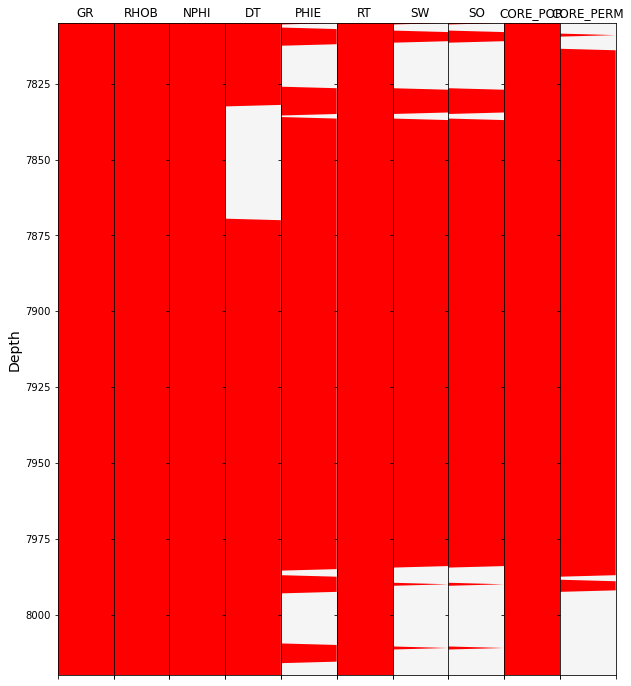

In [6]:
fig = plt.subplots(figsize=(10,12))

#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)



columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

---
# Interrogation of Well Log Data Using Python’s Altair 

### Geolog is quite capable of displaying well log data in the form of cross plots, frequency histograms and layouts, where all the data is dynamically linked. However, python’s Altair package allows the user to plot all data in a user-defined layout, all on one page, where all data is dynamically linked to all other plot types. The user selects data from one plot and the selected samples then show up on other depth plots, cross plots and histograms. The unselected data is grayed out and only the selected data actually appears in color. 

### We have observed similar capabilities in TIBCO Spotfire, but now this is all available with python's Altair. 

## The following is an interrogation of well log data using Altair, which employs depth plots, cross plots and histograms in this visualization:

In [7]:
#!/usr/bin/env python3
# python loglan

# Imports


'''
  select the proper Neutron-Density Chartbook file
'''

#file = r'./data/cnl_chart_1pt0.xlsx'
file = r'./data/cnl_chart_1pt1.xlsx'
#file = r'./data/tnph_chart_1pt0.xlsx'
#file = r'./data/tnph_chart_1pt19.xlsx'
df_chart = pd.read_excel(file,index_col=False)
#df_chart.head()


'''
  PEF vs. RHOB overlay
'''

#Load PEF vs. RHOB overlay chart
file = r'./data/PEF_Rhob_chart.xlsx'
df_pef = pd.read_excel(file,index_col=False)
df_pef.head()


'''    
  Select the proper Pickett data
  Adjust the Rw and m in the file designated below.
'''

file = r'./data/Pickett_Ro_chart.xlsx'
df_pickett = pd.read_excel(file,index_col=False)
#df_pickett.head()


'''    
  Select log curves for DataFrame called df
'''
#df = pd.DataFrame({'DEPTH':depth, 'RHOB':rhob, 'NPHI':nphi, 'ILD':ild, 'GR':gr, 'PHIT':phit,'PEF':pef, 'DT':dt })

#read the file
file = r'./data/main_well.xlsx'
df_log = pd.read_excel(file,index_col=False)
 
 
interval = alt.selection_interval()

bottom = max(df_log['DEPTH'])
top = min(df_log['DEPTH'])

#------------------------------------------------
#
#       Depth of Depth Track
#
#------------------------------------------------

base=alt.Chart(df_log).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top))
    ),
).properties(
    width=150,
    height=600,
    #title='GR',
    selection=interval
)

#no depth labels for base2      
base2=alt.Chart(df_log).mark_point(clip=True).encode(
    alt.Y('DEPTH:Q',
        scale=alt.Scale(domain=(bottom, top)), axis=alt.Axis(labels=False),title='',
    ),
).properties(
    width=150,
    height=600,
    title='',
    selection=interval
)

#------------------------------------------------
#
#       Log Curves of Depth Track
#
#------------------------------------------------
gr = base.mark_circle(clip=True, size=50).encode(
    x='GR:Q',  
    #size=('PHIX:Q'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(domain=(0, 75),scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='GR:Q', 
).properties(
    title='GR',
    selection=interval
)
   
rhob = base2.mark_circle(clip=True , size=50).encode(
    alt.X('RHOB:Q',
        scale=alt.Scale(domain=(2, 3))
    ),     
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='RHOB',
    selection=interval
)
 
nphi = base2.mark_circle(clip=True, size=50).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(.45, -0.15))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='NPHI:Q', 
).properties(
    title='NPHI',
    selection=interval
)

dt = base2.mark_circle(clip=True, size=50).encode(
    alt.X('DT:Q',
        scale=alt.Scale(domain=(112, 28))
    ),     
    #y=('DEPTH'),
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='DT:Q', 
).properties(
    title='DT',
    selection=interval
)

rt = base2.mark_circle(clip=True, size=50).encode(
    alt.X('RT:Q', 
          scale=alt.Scale(type='log', domain=(0.2, 2000.0))
    ),
    #x='LRT:Q',  
    #y=('DEPTH'),
    #color=alt.value('black'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='RT:Q', 
).properties(
    title='RT',
    selection=interval
)

phit = base2.mark_circle(clip=True, size=50).encode(
    alt.X('PHIE:Q',
        scale=alt.Scale(domain=(.45, -0.15))
    ),    
    #color=alt.value('blue'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PHIE:Q', 
).properties(
    title='PHIE',
    selection=interval
)
  

#------------------------------------------------
#
#       Neutron-Density Cross Plot
#
#------------------------------------------------
nd_chart = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

nd_chart2 = alt.Chart(df_chart).mark_line().encode(
    alt.X('CNL_chart:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

ndxplot = base.mark_circle(clip=True,size=50).encode(
    alt.X('NPHI:Q',
        scale=alt.Scale(domain=(-0.05, 0.6))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 1.9))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='RHOB:Q', 
).properties(
    title='Neut-Den Xplot (GR on Color Axis)',
    width=250,
    height=250,
    selection=interval
)


 
#------------------------------------------------
#
#       PEF-Density Cross Plot
#
#------------------------------------------------
pef_chart = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pef_chart2 = alt.Chart(df_pef).mark_line().encode(
    alt.X('PEF_chart:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB_chart:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    color=alt.condition(interval, 'Por:O', alt.value('black'),scale=alt.Scale(scheme='rainbow'),legend=None),
    #color=alt.value('black'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pefxplot = base.mark_circle(clip=True, size=50).encode(
    alt.X('PEF:Q',
        scale=alt.Scale(domain=(0, 10))
    ),    
    alt.Y('RHOB:Q',
        scale=alt.Scale(domain=(3, 2))
    ),    
    #x='NPHI:Q',  
    #y=('RHOB'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='PEF:Q', 
).properties(
    title='PEF-RHOB Xplot (GR on Color Axis)',
    width=250,
    height=250,
    selection=interval
)



#------------------------------------------------
#
#       Pickett Plot
#
#------------------------------------------------
pickett_chart = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_Ro:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('blue'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)

pickett_chart8 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt75:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('cyan'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart6 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt5:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('yellow'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart4 = alt.Chart(df_pickett).mark_line(clip=True, size=2 ,strokeDash=[5,5]  ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt25:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('orange'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett_chart2 = alt.Chart(df_pickett).mark_line(clip=True , size=2 ,strokeDash=[5,5] ).encode(
    alt.X('Rt_Pickett:Q',
        scale=alt.Scale(type='log',domain=(.01, 1000))
    ),    
    alt.Y('Por_at_0pt1:Q',
        scale=alt.Scale(type='log',domain=(0.01, 1.0))
    ),    
    #color=alt.condition(interval, 'Lith:O', alt.value('black'),scale=alt.Scale(scheme='sinebow')),
    color=alt.value('red'),
).properties(
    #title='Neut-Den Xplot with GR on Color Axis',
    width=250,
    height=250
    #selection=interval
)
pickett = base.mark_circle(clip=True, size=50).encode(
    alt.X('RT:Q',
        scale=alt.Scale(type='log',domain=(.01, 100))
    ),    
    alt.Y('PHIE:Q',
        scale=alt.Scale(type='log',domain=(.01, 1))
    ),    
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
    tooltip='RT:Q', 
).properties(
    title='Pickett Plot (GR on Color Axis)',
    width=250,
    height=250,
    selection=interval
)



#------------------------------------------------
#
#       Histograms
#
#------------------------------------------------
grhist = alt.Chart(df_log).mark_bar(clip=True,size=5).encode(
    #alt.X("GR:Q", bin=alt.Bin(maxbins=75)),
    alt.X('GR:Q',
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(0,50)),
    ),
    y='count():Q',
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),    
).properties(
    title='GR Hist',
    width=250,
    height=250,
    selection=interval
)

rhobhist = alt.Chart(df_log).mark_bar(clip=True,size=5).encode(
    #alt.X("RHOB:Q", bin=alt.Bin(maxbins=75)),
    alt.X('RHOB:Q',
        #bin=True,
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(2.0,3.0)),
    ),       
    y='count():Q',
    #color=alt.value('red'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='RHOB Hist',
    width=250,
    height=250,
    selection=interval
)

nphihist = alt.Chart(df_log).mark_bar(clip=True,size=5).encode(
    #alt.X("NPHI:Q",  bin=alt.Bin(maxbins=75)),
    alt.X('NPHI:Q',
        #bin=True,
        bin=alt.Bin(maxbins=75),
        scale=alt.Scale(domain=(0.45, -0.05)),
    ),
    y='count():Q',
    #color=alt.value('green'),
    color=alt.condition(interval, 'GR:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'),legend=None),
).properties(
    title='NPHI Hist',
    width=250,
    height=250,
    selection=interval
)


#------------------------------------------------
#
#       Define Plot Regions for Altair
#
#------------------------------------------------

depth = gr | rhob | nphi |  phit | rt 

xplot = ndxplot+nd_chart+nd_chart2| pefxplot+pef_chart+pef_chart2 |pickett+pickett_chart+pickett_chart8+pickett_chart6+pickett_chart4  
   
hist =  grhist | rhobhist | nphihist

plot = depth & xplot & hist

plot

#plot.show()


alt.VConcatChart(...)